In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

### Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
### Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com))

Если идей нет, можете взять один из перечисленных ниже:

* [данные приложений из Google Play](https://www.kaggle.com/datasets/lava18/google-play-store-apps);
* [данные о видео из трендов YouTube](https://www.kaggle.com/datasets/datasnaek/youtube-new);
* [данные об уровне счастья в разных странах](https://www.kaggle.com/datasets/unsdsn/world-happiness).
## Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [50]:
world_happiness_report_2015 = pd.read_csv('./Data/2015.csv')
world_happiness_report_2016 = pd.read_csv('./Data/2016.csv')
world_happiness_report_2017 = pd.read_csv('./Data/2017.csv')
world_happiness_report_2018 = pd.read_csv('./Data/2018.csv')
world_happiness_report_2019 = pd.read_csv('./Data/2019.csv')

* Country - Название страны.
* Region - Регион, к которому принадлежит страна.
* Happiness Rank - Ранг страны на основе оценки счастья.
* Happiness Score - Показатель, измеренный в 2015 году, задавая отобранным людям вопрос: "Как бы вы оценили свое счастье по шкале от 0 до 10, где 10 - самое счастливое".
* Standard Error - Стандартная ошибка оценки счастья.
* Economy (GDP per Capita) - Степень, в которой ВВП способствует расчету оценки счастья.
* Family - Степень, в которой семья вносит свой вклад в расчет оценки счастья.
* Health (Life Expectancy) - Степень, в которой семья вносит свой вклад в расчет оценки счастья.
* Freedom - Степень, в которой свобода способствовала расчету оценки счастья.
* Trust (Government Corruption) - Степень, в которой восприятие коррупции способствует счастью.
* Generosity - Степень, в которой щедрость способствовала расчету оценки счастья.
* Dystopia Residual - Степень, в которой Dystopia Residual способствовала расчету оценки счастья.

In [28]:
world_happiness_report_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### 1. Линейный график.

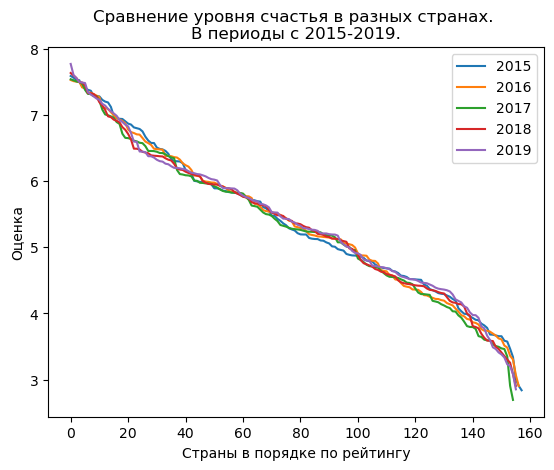

In [164]:
plt.plot(world_happiness_report_2015['Happiness Score'])
plt.plot(world_happiness_report_2016['Happiness Score'])
plt.plot(world_happiness_report_2017['Happiness.Score'])
plt.plot(world_happiness_report_2018['Score'])
plt.plot(world_happiness_report_2019['Score'])
plt.title('Сравнение уровня счастья в разных странах. \nВ периоды с 2015-2019.')
plt.xlabel('Страны в порядке по рейтингу')
plt.ylabel('Оценка')
plt.legend(['2015', '2016', '2017', '2018', '2019'])
plt.show()

### 2. Диаграмма рассеяния.

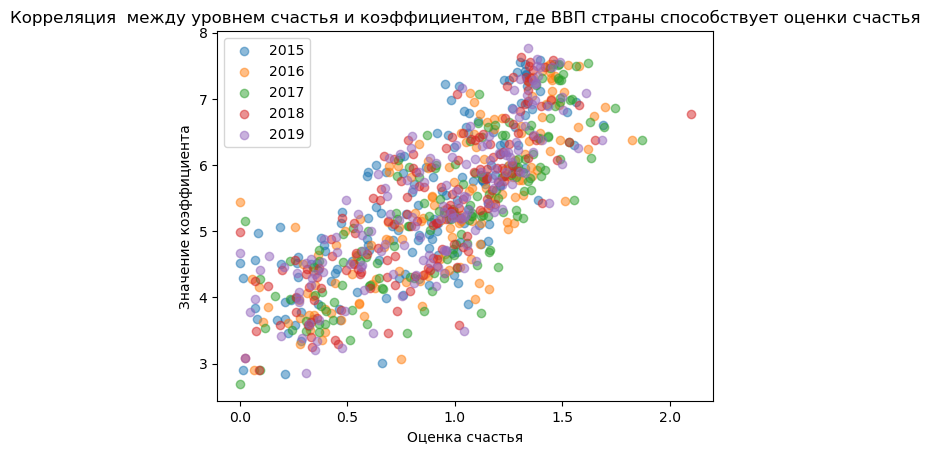

In [165]:
plt.scatter(
    x=world_happiness_report_2015['Economy (GDP per Capita)'], 
    y=world_happiness_report_2015['Happiness Score'],
    alpha=0.5
)
plt.scatter(
    x=world_happiness_report_2016['Economy (GDP per Capita)'], 
    y=world_happiness_report_2016['Happiness Score'],
    alpha=0.5
)
plt.scatter(
    x=world_happiness_report_2017['Economy..GDP.per.Capita.'], 
    y=world_happiness_report_2017['Happiness.Score'],
    alpha=0.5
)
plt.scatter(
    x=world_happiness_report_2018['GDP per capita'], 
    y=world_happiness_report_2018['Score'],
    alpha=0.5
)
plt.scatter(
    x=world_happiness_report_2019['GDP per capita'], 
    y=world_happiness_report_2019['Score'],
    alpha=0.5
)
plt.title('Корреляция  между уровнем счастья и коэффициентом, где ВВП страны способствует оценки счастья')
plt.xlabel('Оценка счастья')
plt.ylabel('Значение коэффициента')
plt.legend(['2015', '2016', '2017', '2018', '2019'], loc='upper left')
plt.show()

### 3. BarChar.

In [155]:
mean_score_by_region_2015 = pd.DataFrame(world_happiness_report_2015 \
                                    .groupby('Region') \
                                    .agg('mean')['Happiness Score']) \
                                .reset_index()
mean_score_by_region_2015

,Region,Happiness Score
0,Australia and New Zealand,7.285000
1,Central and Eastern Europe,5.332931
2,Eastern Asia,5.626167
3,Latin America and Caribbean,6.144682
4,Middle East and Northern Africa,5.406900
5,North America,7.273000
6,Southeastern Asia,5.317444
7,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800
9,Western Europe,6.689619


Text(0, 0.5, 'Оценка уровня счастья.')

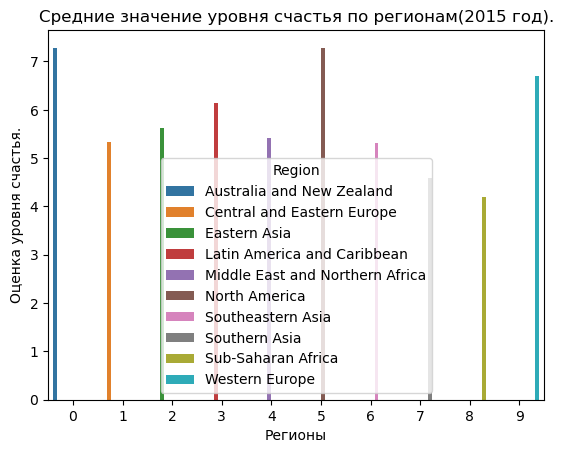

In [156]:
sns.barplot(
    data=mean_score_by_region_2015, 
    x=mean_score_by_region_2015.index, 
    y='Happiness Score',
    hue='Region'
)
plt.title('Средние значение уровня счастья по регионам(2015 год).')
plt.xlabel('Регионы')
plt.ylabel('Оценка уровня счастья.')

### 4. HeatMap.

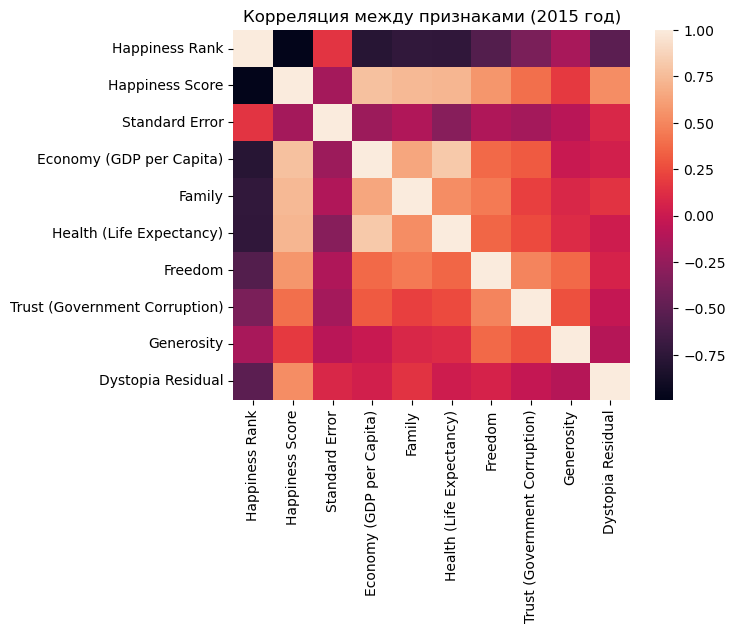

In [167]:
sns.heatmap(world_happiness_report_2015.corr())
plt.title('Корреляция между признаками (2015 год)')
plt.show()

In [162]:
world_happiness_report_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [163]:
world_happiness_report_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
